# Numpy/matplotlib practice with Chelsea the cat

In [61]:
import pandas as pd
import numpy as np
import skimage
import matplotlib.pyplot as plt

Shape = (300, 451, 3)


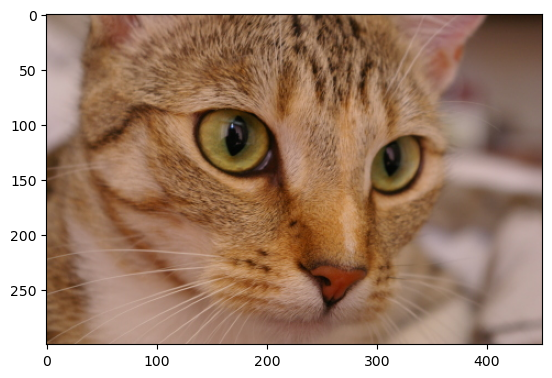

In [62]:
chelsea = skimage.data.chelsea()
print (f"Shape = {chelsea.shape}")
plt.imshow(chelsea)

### Chelsea is a colorful cat with 3 channels of color, shaped as (height=300,width=451,colorchannels=3).  Create a new numpy array called chelsea_grayscale of shape (300,451), averaging out the 3rd (color) axis.  For example, if chelsea[10,10,0]=1 chelsea[10,10,1]=2 chelsea[10,10,1]=3, then chelsea_grayscale[10,10] should equal 2 (average of 1,2,3).  

In [63]:
# You code here
chelsea_grayscale = chelsea.mean(axis=2)


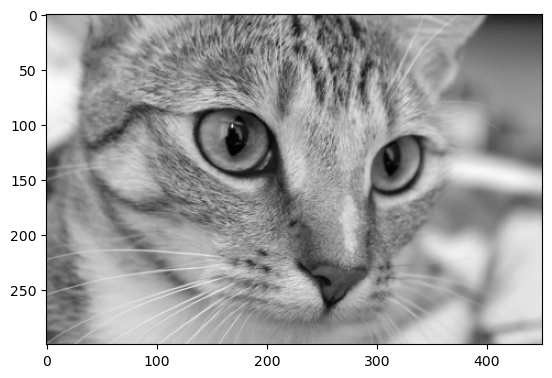

In [64]:
plt.imshow(chelsea_grayscale, cmap="gray")

chelsea_grayscale needs urgent surgery in her left eye, due to a rare genetic disease.  The left eye is defined as the box of size 75x75 pixels, with height axis range 100-174 (inclusive) and width axis range 280-354 (inclusive).  The operation is done by transposing the pixels in this box.  This means that pixel in location [100+a, 280+b] in pre-surgery chelsea_grayscale needs to move to [100+b, 280+a] in post-surgery chelsea-grayscale, for a,b in the range 0..74 (inculsive).  The final result should be stored in chelsea_grayscale (in-place surgery)

In [65]:
# Your code here, try to do it in two lines of code
# (can also be done in one line if you want)
eye_area = chelsea_grayscale[100:175, 280:355]
chelsea_grayscale[100:175, 280:355] = eye_area.T


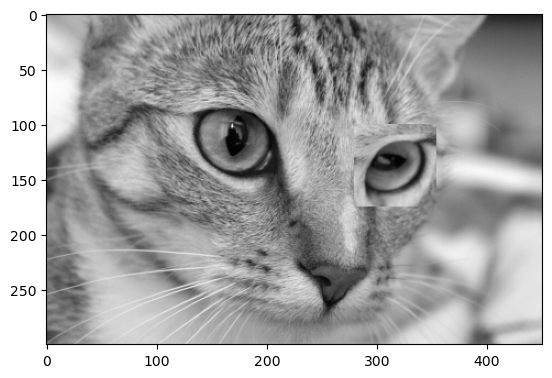

In [66]:
plt.imshow(chelsea_grayscale, cmap="gray")

Post-surgery chelsea_grayscale feels awkward walking around with a funny left eye.  To avoid being recognized on the street, blur her image by adding noise to each pixel.  The noise should be distributed uniformly (as a floating point number) in the range [-25.0,25.0] independently for each pixel.  However, the value of each pixel cannot go above 127, or below 0, so you need to clip values that are above 127 (to 127) or below 0 (to 0).  For example, a pixel that gets a value of 130.5 after adding the random noise should be converted to 127, and a pixel with a value of -3.0 after add the random noise should be converted to 0.0.  The result should be stored in anonymous_cat

Use np.random.rand, np.minimum, np.maximum.  Avoid using loops.

In [67]:
# Your code here
noise = np.random.uniform(-25.0, 25.0, chelsea_grayscale.shape)
anonymous_cat = np.clip(chelsea_grayscale + noise, 0, 127)

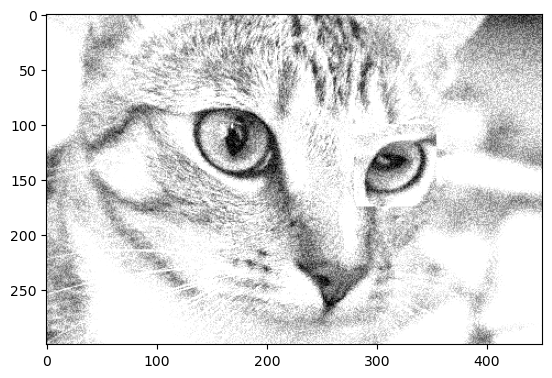

In [68]:
plt.imshow(anonymous_cat, cmap="gray")

Chelsea the grayscale post-surgery cat, disguised as an anonymous cat, was caught harassing a mouse in the park.  Security cameras at the park caught anonymous_cat, but in order to press charges the authorities need to prove that anonymous_cat is the same as (post-surgery) chelsea_grayscale.  To do that, they need to compute the distance between the images anonymous cat and chelsea_grayscale.  Mathematically, the distance equals the square root of the mean, over all pixel locations [a,b], of the square of (chelsea_grayscale[a,b]-anonymous_cat[a,b]).  Compute distance in a single line of code.
distance = sqrt(
  mean((
    chelsea_grayscale[a,b]-anonymous_cat[a,b])**2 over all a,b)

  You should compute the distance in one line of code.  Feel free to use numpy arithmetic, or if you want to learn something new, look at https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [69]:
# Your code here
distance = np.linalg.norm(chelsea_grayscale - anonymous_cat)

In [70]:
print (f"Distance={distance}")

Distance=7120.0392470762135


According to the law, post-surgery chelsea_grayscale is identified (and convicted) if distance < 50.  If she is convicted, she goes to jail.  Write code that checks if distance < 50, and if so puts chelsea_grayscale behind bars.  In order to put chelsea_grayscale behind bars, you need to color all pixels in the following horizontal positions as black (grayscale intensity 0)

0,1,2,3,4, 20,21,22,23,24,  40,41,42,43,44,   60,61,62,63,64 ....

The output should be computed on chelsea_grayscale in-place. You are allowed to use one loop only.  in the output the image of chelsea_grayscale should have vertical black bard.

In [71]:
# Your code here
jailed = distance < 50
if jailed:
    for i in range(0, chelsea_grayscale.shape[0], 20):
        chelsea_grayscale[i:i+5, :] = 0
print(f"Distance = {distance}, Jailed: {jailed}")

Distance = 7120.0392470762135, Jailed: False


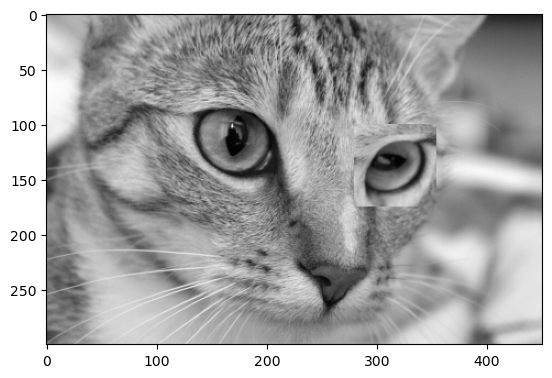

In [72]:
plt.imshow(chelsea_grayscale, cmap='gray')

If chelsea_grayscale goes to jail, this is shocking news beacuse chelsea_grayscale is a prominent well known member of the community.  The tabloid newspapers publish a special report on the front-page, with the images chelsea_grayscale (behind bars) on top of anonymous_cat.

Create an image of shape [600, 451] (double the height, same width) with chelsea_grayscale (behind bars) in the top and anonymous_cat in the bottom.  The name of the image variable is tabloid_frontpage.

In case chelsea_grayscale is not in jail, you don't need to do anything.

In [73]:
# Your code here
# I have edited the given code below

In [74]:
if jailed:
  #Creating image
  tabloid_frontpage = np.vstack((chelsea_grayscale, anonymous_cat))
  # Showing tabloid front page
  plt.imshow(tabloid_frontpage, cmap="gray")
else:
  # I have adjusted this condition, since it is not clear for user at all whether the command has worked
  print("Chelsea is not in jail, no tabloid front page created.")
plt.show()

Chelsea is not in jail, no tabloid front page created.


## IN CASE CHELSEA IS ACTUALLY IN JAIL:

Distance = 7120.0392470762135, Jailed: True


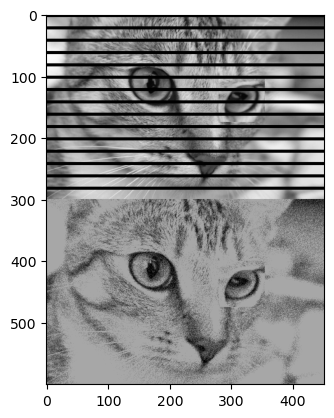

In [75]:
jailed = distance < 8000
if jailed:
    #Bars
    for i in range(0, chelsea_grayscale.shape[0], 20):
        chelsea_grayscale[i:i+5, :] = 0
    #Creating image
    tabloid_frontpage = np.vstack((chelsea_grayscale, anonymous_cat))
    plt.imshow(tabloid_frontpage, cmap="gray")
print(f"Distance = {distance}, Jailed: {jailed}")
